#### Loading Data from CSV file

In [1]:
import pandas as pd
import  numpy as np
from numpy.linalg import LinAlgError

In [2]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\daily-total-female-births-CA.csv", header=0)

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df['date'].dtype

dtype('O')

#### Loading data with parse_date

In [5]:
df2 = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\daily-total-female-births-CA.csv", header=0, parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2['date'].dtype

dtype('<M8[ns]')

#### Loading data as series(ie dates as indedx)

In [8]:
series = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\daily-total-female-births-CA.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [10]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


#### Time series - Data Visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
dataviz_df = df2.copy()

In [13]:
dataviz_df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:>

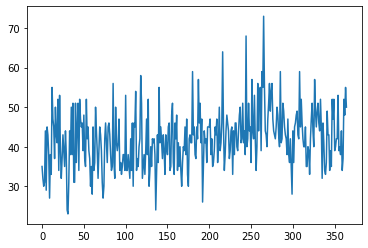

In [14]:
dataviz_df['births'].plot()

In [15]:
dataviz_df.index = dataviz_df['date']

<AxesSubplot:xlabel='date'>

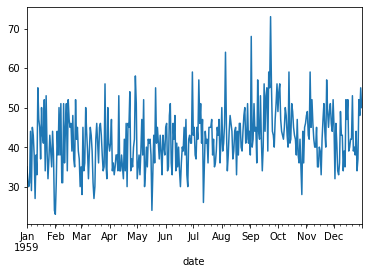

In [16]:
dataviz_df['births'].plot()

##### Zooming in

In [17]:
dataviz_df2 = dataviz_df[(dataviz_df['date']>'1959-01-01') & (dataviz_df['date']<='1959-01-10')].copy()

In [18]:
dataviz_df2.head()

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29


<AxesSubplot:xlabel='date'>

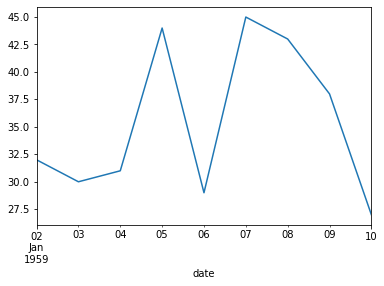

In [19]:
dataviz_df2['births'].plot()

#### Trend Line

In [20]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

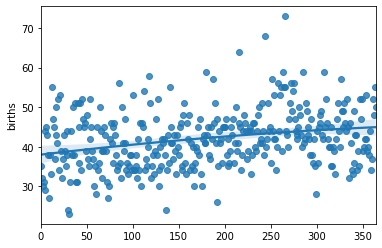

In [21]:
sns.regplot(x=df2.index.values, y=df2['births'], order=2)

## Aircraft Miles

In [22]:
miles_df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])

In [23]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

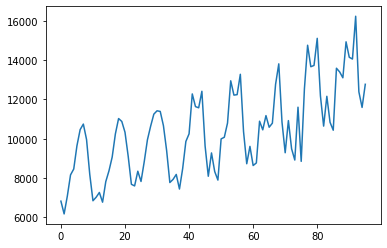

In [24]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

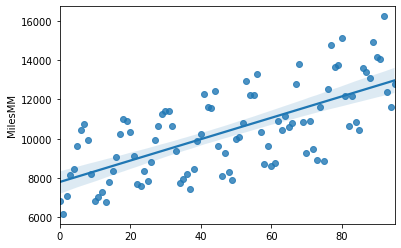

In [25]:
sns.regplot(x=miles_df.index.values, y=miles_df['MilesMM'])

#### Removing Seasonality

In [26]:
miles_df['year'] = miles_df['Month'].dt.year

In [27]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [28]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

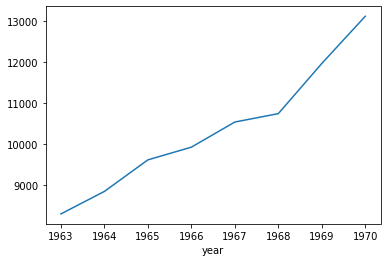

In [29]:
miles_df.groupby('year')['MilesMM'].mean().plot()

#### Creating Lag Plot

In [30]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [31]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

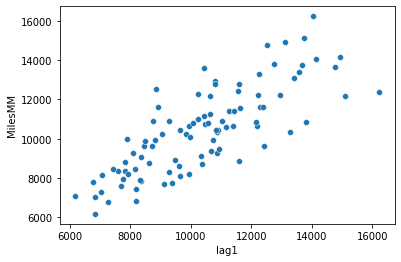

In [32]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [33]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

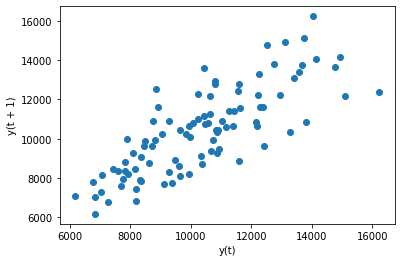

In [34]:
lag_plot(miles_df['MilesMM'])

#### Autocorrelation Plots

In [35]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

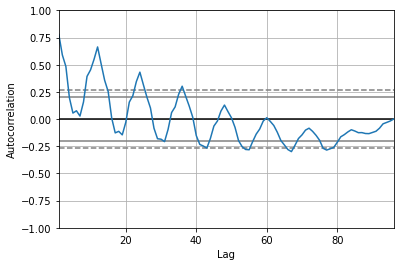

In [36]:
autocorrelation_plot(miles_df['MilesMM'])

### Feature Engineering
* Date time feature
* Lag feature
* Window Feature
* Expanding Feature

##### Date time features

In [37]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [38]:
features = df2.copy()

In [39]:
features['year'] = df2['date'].dt.year

In [40]:
features['month'] =  df2['date'].dt.month

In [41]:
features['day'] = df2['date'].dt.day

In [42]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


##### Lag Features

In [43]:
features['lag1'] = df2['births'].shift(1)

In [44]:
features['lag2'] = df2['births'].shift(365)

In [45]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


##### Window Features

In [46]:
features['Roll_mean'] = df2['births'].rolling(window=7).mean()

In [47]:
features['Roll_max'] = df2['births'].rolling(window=3).max()

In [48]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,NaN,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,NaN,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,NaN,44.0


##### Expanding Features

In [49]:
features['Expand_max'] = df2['births'].expanding().max()

In [50]:
features['Expand_mean'] = df2['births'].expanding().mean()

In [51]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max,Expand_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0,35.000000
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN,NaN,35.0,33.500000
2,1959-01-03,30,1959,1,3,32.0,NaN,NaN,35.0,35.0,32.333333
3,1959-01-04,31,1959,1,4,30.0,NaN,NaN,32.0,35.0,32.000000
4,1959-01-05,44,1959,1,5,31.0,NaN,NaN,44.0,44.0,34.400000


### Resampling(Up & Down)

In [52]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


##### Downsampling

In [53]:
quarterly_miles_df = miles_df.resample('Q', on="Month").mean()

In [54]:
quarterly_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-03-31,6696.333333,1963.0,6502.500000
1963-06-30,8756.000000,1963.0,7902.666667
1963-09-30,10392.333333,1963.0,10286.000000
1963-12-31,7356.333333,1963.0,8335.000000
1964-03-31,7287.666667,1964.0,7023.666667


In [55]:
yearly_miles_df = miles_df.resample('A', on='Month').sum()

In [56]:
yearly_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-12-31,99603,23556,92576.0
1964-12-31,106192,23568,105617.0
1965-12-31,115431,23580,115100.0
1966-12-31,119154,23592,117807.0
1967-12-31,126515,23604,126181.0


##### Upsampling

In [57]:
upsample_miles_df = miles_df.resample('D', on='Month').mean()

In [58]:
upsample_miles_df.head(35)

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.0,1963.0,NaN
1963-01-02,NaN,NaN,NaN
1963-01-03,NaN,NaN,NaN
1963-01-04,NaN,NaN,NaN
1963-01-05,NaN,NaN,NaN
1963-01-06,NaN,NaN,NaN
1963-01-07,NaN,NaN,NaN
1963-01-08,NaN,NaN,NaN
1963-01-09,NaN,NaN,NaN


In [59]:
interpolated_miles_df = upsample_miles_df.interpolate(method='linear')

In [60]:
interpolated_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.000000,1963.0,NaN
1963-01-02,6806.064516,1963.0,NaN
1963-01-03,6785.129032,1963.0,NaN
1963-01-04,6764.193548,1963.0,NaN
1963-01-05,6743.258065,1963.0,NaN


<AxesSubplot:xlabel='Month'>

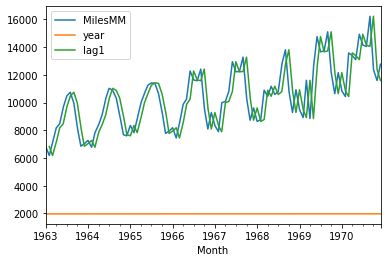

In [61]:
interpolated_miles_df.plot()

In [62]:
poly_interpolated_miles_df = upsample_miles_df.interpolate(method='spline', order=2)

In [63]:
poly_interpolated_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.000000,1963.000000,NaN
1963-01-02,6775.328886,1962.607682,NaN
1963-01-03,6725.739829,1962.610377,NaN
1963-01-04,6678.197709,1962.613071,NaN
1963-01-05,6632.702526,1962.615766,NaN


<AxesSubplot:xlabel='Month'>

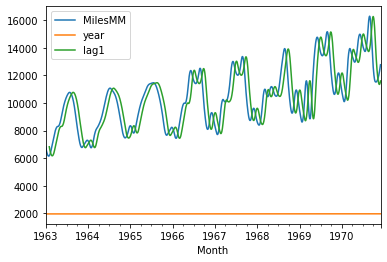

In [64]:
poly_interpolated_miles_df.plot()

### Decomposing Time Series
* Additive Model 
 y(t) = Level + Trend + Seasonality + Noise

* Multiplicative Model
 y(t) = Level * Trend * Seasonality * Noise

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
miles_decompose_df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])

In [67]:
miles_decompose_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [68]:
miles_decompose_df.index = miles_decompose_df['Month']

In [69]:
result = seasonal_decompose(miles_decompose_df['MilesMM'], model = 'additive')

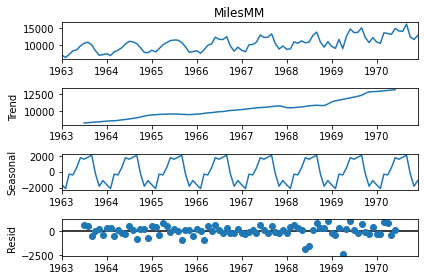

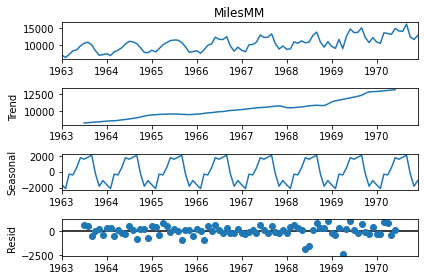

In [70]:
result.plot()

In [71]:
result2 = seasonal_decompose(miles_decompose_df['MilesMM'], model='multiplicative')

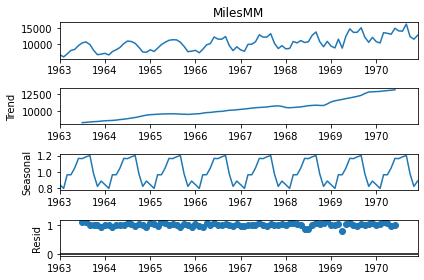

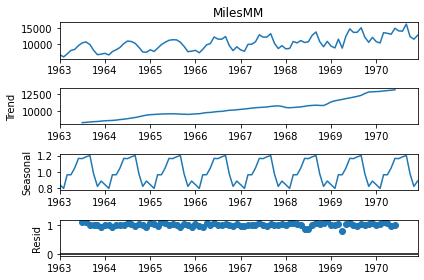

In [72]:
result2.plot()

### Differencing

In [73]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [74]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods = 1)

In [75]:
miles_df.head()

,Month,MilesMM,year,lag1,MilesMM_diff_1
0,1963-01-01,6827,1963,NaN,NaN
1,1963-02-01,6178,1963,6827.0,-649.0
2,1963-03-01,7084,1963,6178.0,906.0
3,1963-04-01,8162,1963,7084.0,1078.0
4,1963-05-01,8462,1963,8162.0,300.0


In [76]:
miles_df.index = miles_df['Month']

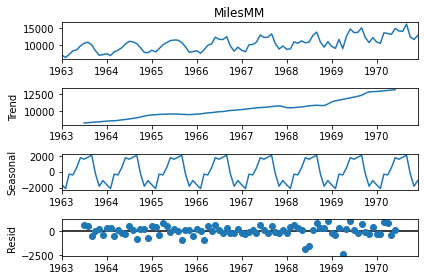

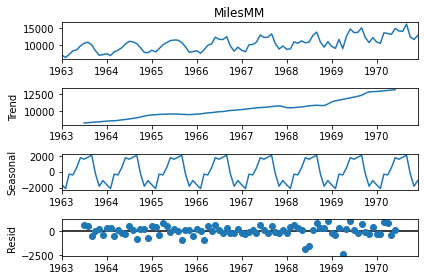

In [77]:
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

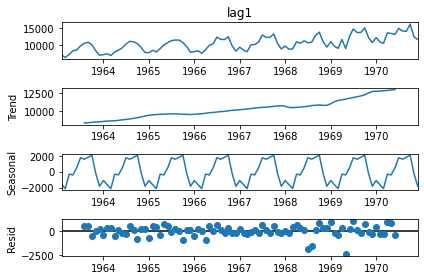

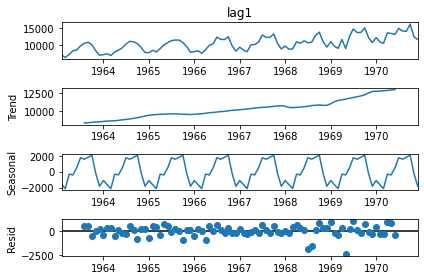

In [78]:
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

In [79]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

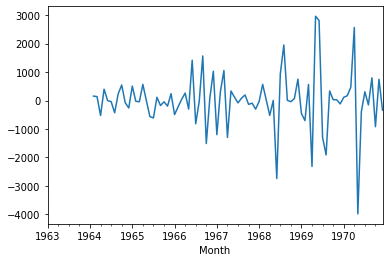

In [80]:
miles_df['MilesMM_diff_12'].plot()

In [81]:
result_b = seasonal_decompose(miles_df.iloc[12:,4], model = 'additive')

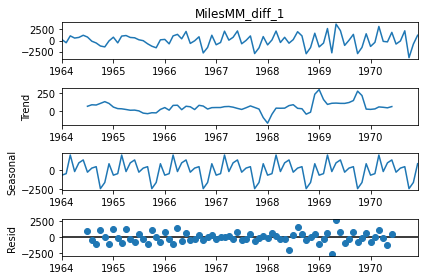

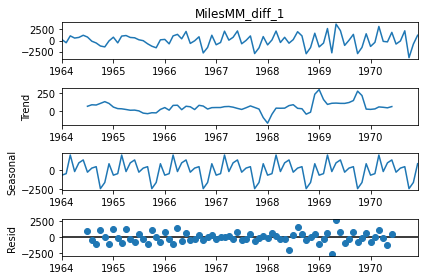

In [82]:
result_b.plot()

## Implementation

##### Test-Train Split

In [83]:
temp_df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\daily-min-temperatures.csv", header=0, parse_dates=[0])

In [84]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [85]:
temp_df.shape

(3650, 2)

In [86]:
train_size = int(temp_df.shape[0]*0.8)

In [87]:
train_size

2920

In [88]:
train = temp_df[0:train_size]

In [89]:
test = temp_df[train_size:]

In [90]:
train.shape

(2920, 2)

In [91]:
test.shape

(730, 2)

### Persitence Model

In [92]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\daily-min-temperatures.csv", header=0, parse_dates=[0])

In [93]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [94]:
df['t'] = df['Temp'].shift(1)

In [95]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [96]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [97]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [98]:
test.head()

,Date,Temp,t
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6


In [99]:
df[2:3]

,Date,Temp,t
2,1981-01-03,18.8,17.9


In [100]:
train_x, train_y = train['t'],train['Temp']

In [101]:
test_x, test_y = test['t'], test['Temp']

#### Walk Forward Validation

In [102]:
predictoins = test_x.copy()

In [103]:
print(predictoins)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [104]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictoins)
mse

3.4228571428571413

In [105]:
from matplotlib import pyplot

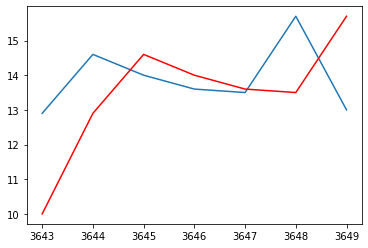

In [106]:
pyplot.plot(test_y)
pyplot.plot(predictoins, color='red')

#### Autoregression Model

In [107]:
df

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5


In [108]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [109]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [110]:
from statsmodels.tsa.ar_model import AR

In [111]:
model = AR(train)
model_fit = model.fit()

D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


###### No. of lag variable

In [112]:
model_fit.k_ar

29

Coef of lag variable

In [113]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [114]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [115]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [116]:
predictions.iloc[0]

11.871274847727888

In [117]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions )
mse

1.5015252310067646

Walk Forward

In [118]:
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end = len(data)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data =  np.append(data, t)
    data = pd.Series(data)

D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


11.871274847727888
13.660699943835207
14.35316414409015
13.430120791626974
13.374756477185104
13.479111299420513
14.767773018439886


In [119]:
predict

[11.871274847727888,
 13.660699943835207,
 14.35316414409015,
 13.430120791626974,
 13.374756477185104,
 13.479111299420513,
 14.767773018439886]

In [120]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.4524568425185185

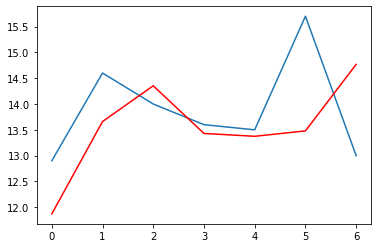

In [121]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

Moving Average Model

In [122]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [123]:
df['Resid'] = df['Temp']- df['t']

In [124]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [125]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [126]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [127]:
from statsmodels.tsa.ar_model import AR

In [128]:
model = AR(train)

D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [129]:
model_fit = model.fit()

In [130]:
model_fit.k_ar

29

In [131]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [132]:
pred_resid = model_fit.predict(start = len(train), end = len(train)+len(test)-1)

In [133]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [134]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [135]:
predictions_1 = df.t[df.shape[0]-7:] + pred_resid

In [136]:
predictions_1

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [137]:
mse = mean_squared_error(test_y, predictions_1)
mse

2.0493985566482085

# ARIMA Model

In [138]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\shampoo.csv", header=0, parse_dates=[0])

In [139]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<AxesSubplot:>

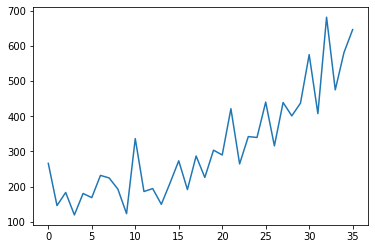

In [140]:
df['Sales'].plot()

Trend is Quadratic
D = 2

Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

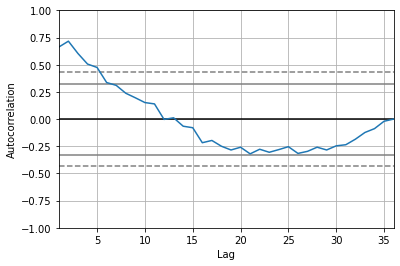

In [141]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

P = 5



Partial Autocorrelation Plot

In [161]:
from statsmodels.graphics.tsaplots import plot_pacf

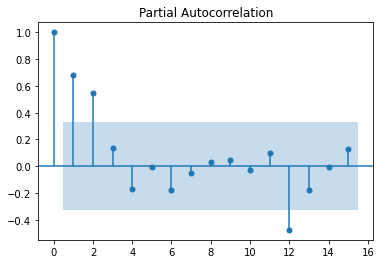

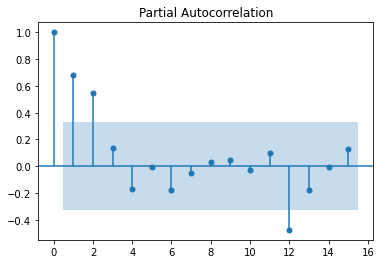

In [162]:
plot_pacf(df['Sales'], lags=15)

Q = 2

In [171]:
from statsmodels.tsa.arima_model import ARIMA

In [201]:
arima_model = ARIMA(df['Sales'], order=(5,2,3))

D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  to start_ar_lags.


In [202]:
arima_model_fit = arima_model.fit()

D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  to s

In [203]:
arima_residuals = arima_model_fit.resid

<AxesSubplot:>

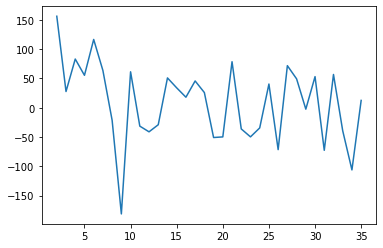

In [204]:
arima_residuals.plot()

In [167]:
residuals.describe()

count    3613.000000
mean       -0.000192
std         3.441768
min       -11.703175
25%        -2.186174
50%         0.091093
75%         2.155374
max        14.885343
dtype: float64

In [207]:
arima_output = arima_model_fit.forecast()

In [208]:
arima_output

(array([578.8706453]),
 array([54.58424636]),
 array([[471.88748831, 685.85380228]]))

**Walk Forward ARIMA**

In [209]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [225]:
train_size_awf = int(df.shape[0]*0.7)

In [226]:
train_awf, test_awf = df.Sales[0:train_size_awf], df.Sales[train_size_awf:]

In [228]:
test_awf.shape

(11,)

In [236]:
data = train_awf
predict_awf = []
for t in test_awf:
    model_awf = ARIMA(data,  order=(5,1,0))
    model_fit_awf = model_awf.fit()
    y = model_fit_awf.forecast()
    print(y[0][0])
    predict_awf.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)


D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  to start_ar_lags.


387.3764001589407
348.15413520455627
386.3088503153242
356.0820190604328
446.37953008659616
394.7372909751678
434.91540342532875
507.9234544482686
435.4829159964702
652.7437764300914
546.3434963614502


In [237]:
predict_awf

[387.3764001589407,
 348.15413520455627,
 386.3088503153242,
 356.0820190604328,
 446.37953008659616,
 394.7372909751678,
 434.91540342532875,
 507.9234544482686,
 435.4829159964702,
 652.7437764300914,
 546.3434963614502]

In [239]:
mse_awf = mean_squared_error(test_awf.values, predict_awf)
mse_awf

8119.122438753163

# **SARIMA**

In [240]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [244]:
sarima_df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\7. ST Academy - Time Series resource files\us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])

In [245]:
sarima_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [247]:
sarima_df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [252]:
sarima_df.index = sarima_df['Month']

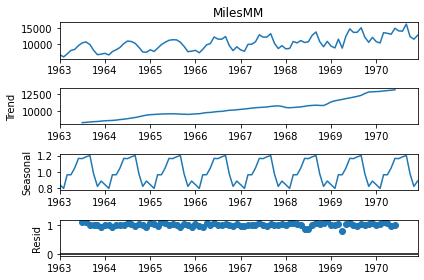

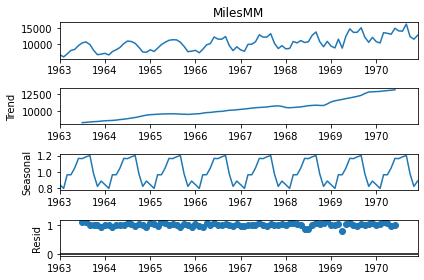

In [254]:
sarima_result_a = seasonal_decompose(sarima_df['MilesMM'], model='multiplicative')
sarima_result_a.plot()

In [256]:
sarima_model = SARIMAX(sarima_df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  
D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  


In [257]:
sarima_model_fit = sarima_model.fit()

D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\envs\conda1\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  from statsmodels.tools.sm_exceptions import ConvergenceWarning


In [258]:
sarima_residuals = sarima_model_fit.resid

<AxesSubplot:xlabel='Month'>

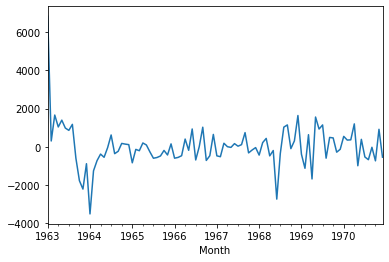

In [259]:
sarima_residuals.plot()

In [260]:
sarima_output = sarima_model_fit.forecast()

In [261]:
sarima_output

1971-01-01    11475.902826
Freq: MS, dtype: float64

In [262]:
sarima_model_fit.forecast(12)

1971-01-01    11475.902826
1971-02-01    11153.422203
1971-03-01    13669.319441
1971-04-01    12647.199312
1971-05-01    14339.022625
1971-06-01    15786.464352
1971-07-01    14979.149260
1971-08-01    15361.990881
1971-09-01    16962.833489
1971-10-01    13682.156776
1971-11-01    12426.933398
1971-12-01    13730.048641
Freq: MS, dtype: float64

In [263]:
yhat = sarima_model_fit.predict()

In [265]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5872.208476
1963-03-01    5422.442504
1963-04-01    7122.588611
1963-05-01    7067.271997
Freq: MS, dtype: float64

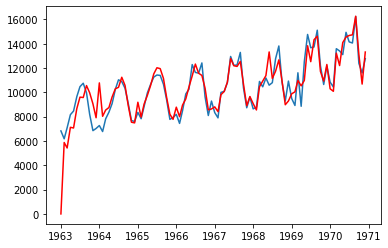

In [267]:
pyplot.plot(sarima_df['MilesMM'])
pyplot.plot(yhat, color='red')